In [ ]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.7 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Function to extract features from audio file
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed

# Function to load and process the RAVDESS dataset
def load_ravdess_data(data_path):
    features = []
    labels = []
    # Walk through directories and subdirectories to find wav files
    for root, dirs, files in os.walk(data_path):
        for filename in files:
            if filename.endswith('.wav'):
                print(f"Processing file: {filename}")  # Debug print to check file processing
                file_path = os.path.join(root, filename)
                feature = extract_features(file_path)
                features.append(feature)
                # Extract emotion label from filename (assuming RAVDESS naming convention)
                emotion = int(filename.split('-')[2])  # Adjust if your naming convention differs
                labels.append(emotion)
    return np.array(features), np.array(labels)


In [ ]:
# Set the path to your RAVDESS dataset in your Google Drive
data_path = '/content/drive/MyDrive/RAVDESS Emotional speech audio'

# Load and process data
X, y = load_ravdess_data(data_path)

# Verify the loaded data
print(f"Loaded {len(X)} samples with {len(y)} labels")


Processing file: 03-01-02-01-02-02-20.wav
Processing file: 03-01-03-01-02-01-20.wav
Processing file: 03-01-02-02-02-01-20.wav
Processing file: 03-01-03-01-02-02-20.wav
Processing file: 03-01-03-01-01-01-20.wav
Processing file: 03-01-02-02-02-02-20.wav
Processing file: 03-01-02-01-01-02-20.wav
Processing file: 03-01-03-01-01-02-20.wav
Processing file: 03-01-02-01-02-01-20.wav
Processing file: 03-01-01-01-02-01-20.wav
Processing file: 03-01-01-01-02-02-20.wav
Processing file: 03-01-01-01-01-02-20.wav
Processing file: 03-01-01-01-01-01-20.wav
Processing file: 03-01-02-01-01-01-20.wav
Processing file: 03-01-02-02-01-02-20.wav
Processing file: 03-01-02-02-01-01-20.wav
Processing file: 03-01-03-02-01-01-20.wav
Processing file: 03-01-04-01-02-02-20.wav
Processing file: 03-01-04-01-01-02-20.wav
Processing file: 03-01-05-02-02-01-20.wav
Processing file: 03-01-05-02-01-01-20.wav
Processing file: 03-01-05-01-02-01-20.wav
Processing file: 03-01-04-01-01-01-20.wav
Processing file: 03-01-04-02-01-02

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Create and train the model
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500)
model.fit(X_train_scaled, y_train)



MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9340277777777778

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.81      0.80        43
           2       0.94      0.91      0.92        66
           3       0.92      0.97      0.95        71
           4       0.98      0.93      0.95        86
           5       0.95      0.98      0.96        81
           6       0.94      0.94      0.94        72
           7       0.95      0.97      0.96        71
           8       0.95      0.91      0.93        86

    accuracy                           0.93       576
   macro avg       0.93      0.93      0.93       576
weighted avg       0.93      0.93      0.93       576



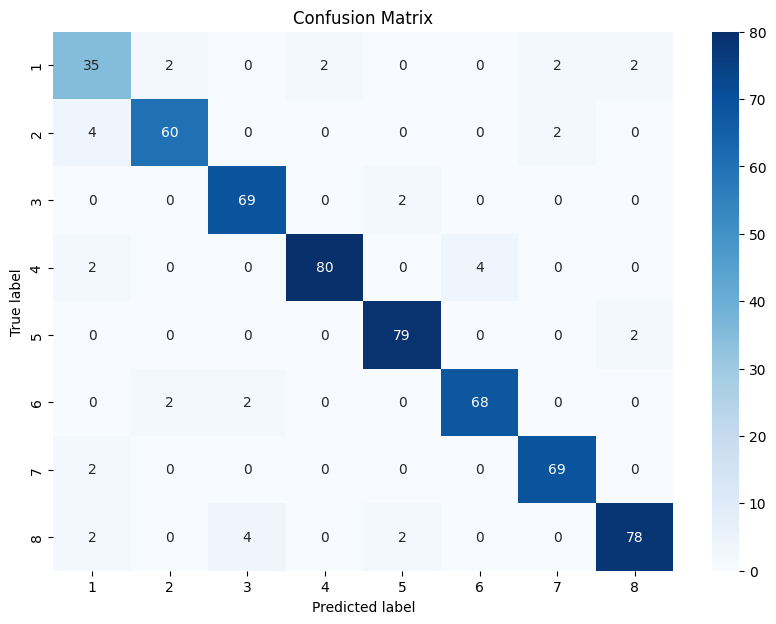

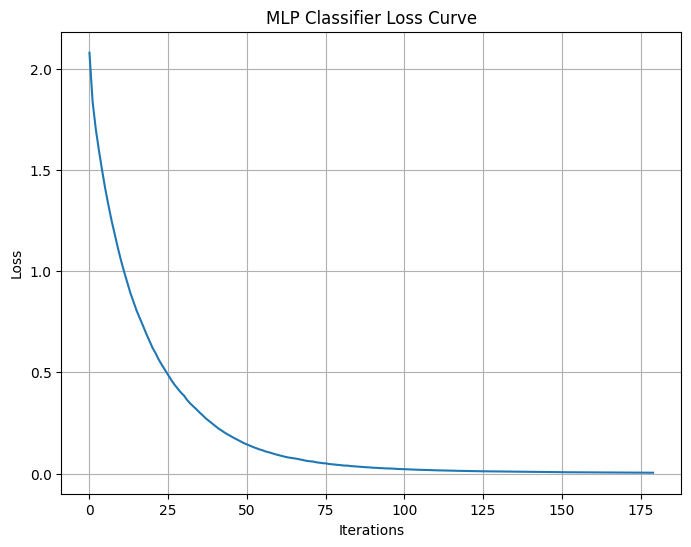

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot the training loss curve if available
if hasattr(model, 'loss_curve_'):
    plt.figure(figsize=(8, 6))
    plt.plot(model.loss_curve_)
    plt.title('MLP Classifier Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()


In [ ]:
import numpy as np

# Calculate class-wise accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)

# Print class-wise accuracies
for i, accuracy in enumerate(class_accuracies, start=1):
    print(f"Accuracy for class {i}: {accuracy:.2f}")

# Calculate overall average accuracy
average_accuracy = np.mean(class_accuracies)
print(f"Average Accuracy across all classes: {average_accuracy:.2f}")


Accuracy for class 1: 0.81
Accuracy for class 2: 0.91
Accuracy for class 3: 0.97
Accuracy for class 4: 0.93
Accuracy for class 5: 0.98
Accuracy for class 6: 0.94
Accuracy for class 7: 0.97
Accuracy for class 8: 0.91
Average Accuracy across all classes: 0.93


In [ ]:
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)


Class Distribution: {1: 192, 2: 384, 3: 384, 4: 384, 5: 384, 6: 384, 7: 384, 8: 384}


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming you have scaled the features
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated scores: {scores}")
print(f"Mean cross-validated accuracy: {scores.mean():.2f}")


Cross-validated scores: [0.49479167 0.46875    0.578125   0.48611111 0.51215278]
Mean cross-validated accuracy: 0.51
